In [28]:
from sklearn.datasets import load_wine
import numpy as np
import collections




In [29]:
from knnor import data_augment

In [30]:
dataset = load_wine()

(unique, counts) = np.unique(dataset['target'], return_counts=True)

print('Unique values of the target variable', unique)
print('Counts of the target variable :', counts)

Unique values of the target variable [0 1 2]
Counts of the target variable : [59 71 48]


In [31]:
X=dataset["data"]
y=dataset["target"]
# do some combination here
y[y==0]=1
y[y==2]=0
print("Original shape=",X.shape,y.shape)
elements_count = collections.Counter(y)
# printing the element and the frequency
print("Original distribution:")
for key, value in elements_count.items():
    print(f"{key}: {value}")

Original shape= (178, 13) (178,)
Original distribution:
1: 130
0: 48


In [32]:
X_min=X[y==0]
X_maj=X[y==1]

import matplotlib.pyplot as plt

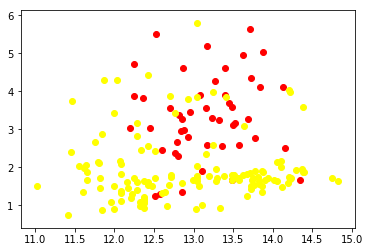

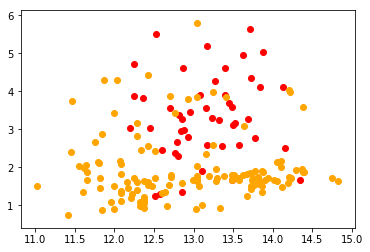

130 48 (178,)
Shape after augmentation (260, 13) (260,)
Final distribution:
1: 130
0: 130


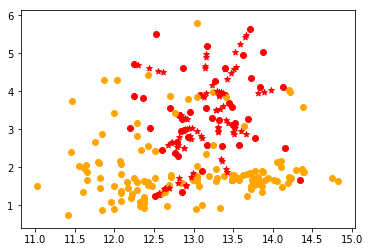

In [52]:
plt.scatter(X_min[:,0],X_min[:,1],color='red')
plt.scatter(X_maj[:,0],X_maj[:,1],color='orange')
plt.savefig("imblanaced.svg")
plt.show()

knnor=data_augment.KNNOR()
X_new,y_new,X_added,y_added=knnor.fit_resample(X,y,
                                               num_neighbors=5,
                                               max_dist_point=0.1,
                                               proportion_minority=0.25,
                                          final_proportion=1)
print("Shape after augmentation",X_new.shape,y_new.shape)
elements_count = collections.Counter(y_new)
# printing the element and the frequency
print("Final distribution:")
for key, value in elements_count.items():
    print(f"{key}: {value}")

    
    
plt.scatter(X_min[:,0],X_min[:,1],color='red')
plt.scatter(X_maj[:,0],X_maj[:,1],color='orange')
plt.scatter(X_added[:,0],X_added[:,1],marker='*',color='red')

plt.savefig("augmented.svg")
plt.show()    

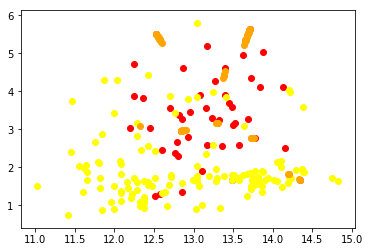